In [1]:
import numpy as np
import pandas as pd
import cmath

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
img = cv.imread('knee_image.png',0)
F = np.fft.fft2(img)

In [3]:
class Blurr():
    def __init__(self,image):
        self.image = image
        self.row = image.shape[0]
        self.col = image.shape[1]

    def get_fourier_transform(self):
        F = np.fft.fft2(self.image)
        return F
    
    def get_inverse_fft(self,fourer):
        img_mod = np.fft.ifft2(fourer)
        return np.abs(img_mod)
        

    def get_blurring_matrix(self,T,a,b):
        H = [ [ 0 for i in range(self.col) ] for j in range(self.row)]
        for i in range(self.row):
            for j in range(self.col):
                p = ((i+1)*a)+((j+1)*b)
                z = math.pi * p
                if (z==0):
                    magnitude=0
                    phase = 0
                else:
                    sin_z = np.sin(z)
                    magnitude =( T/z) * sin_z
                    phase = -z
                    H[i][j]=cmath.rect(magnitude, phase)
        return H

    def get_blurred_image(self, F,H):
        return F*H

    def generate_blurr_constant_a_and_T(self,T=0.5,a=[0],b = [0.1,0.01], dirfol="images/constant_a_and_T/"):
        self.generate_blurr_combination_a_and_b(T,a,b,dirfol)
        return 1
    

    def generate_blurr_constant_b_and_T(self,T=0.5,a=[0.1,0.2,0.3],b = [0.1],dirfol="images/constant_b_and_T/"):
        self.generate_blurr_combination_a_and_b(T,a,b,dirfol)
        return 1


    def generate_blurr_combination_a_and_b(self,T = 0.5,a=[0.1,0.15,0.25,0.35],b=[0.1,0.2,0.3],dirfol="images/combination_a_and_b/"):
        F = self.get_fourier_transform()
        x = 0
        for i in range(len(a)):
            for j in range(len(b)):
                H = self.get_blurring_matrix(T,a[i],b[j])
                Gab = self.get_blurred_image(F,H)
                img_mod = self.get_inverse_fft(Gab)
                x +=1
                plt.figure(figsize=(16,9))
                plt.subplot(121), plt.imshow(self.image, cmap='gray')
                plt.title('Before transformation'), plt.xticks([]), plt.yticks([])

                plt.subplot(122), plt.imshow(img_mod, cmap='gray')
                plt.title('After transformation:Parameters(T= {T}, a= {a},b= {b} )' .format(T=T,a=a[i],b=b[j])), plt.xticks([]), plt.yticks([])

                path = dirfol + 'image_'+ str(T)+'_'+str(a[i])+'_'+str(b[j]) + ".png"
                plt.savefig(path, bbox_inches = 'tight',facecolor='white')
                plt.show()

        return x
    
    def generate_blurr_combination_a_and_b_and_T(self,T=[0.5,1],a=[0.1,0.15],b=[0.1,0.2],dirfol="images/combination_a_and_b_and_T/"):
        for i in range(len(T)):
            self.generate_blurr_combination_a_and_b(T[i],a,b,dirfol)
        return 1
       

In [4]:
blur = Blurr(img)

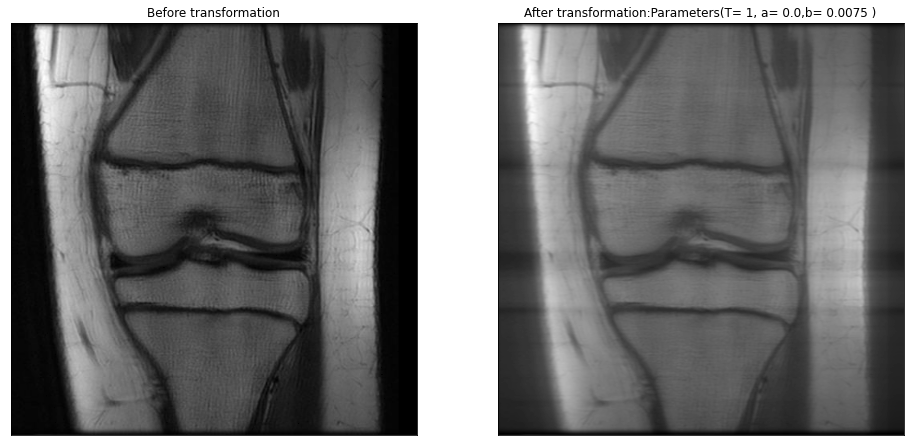

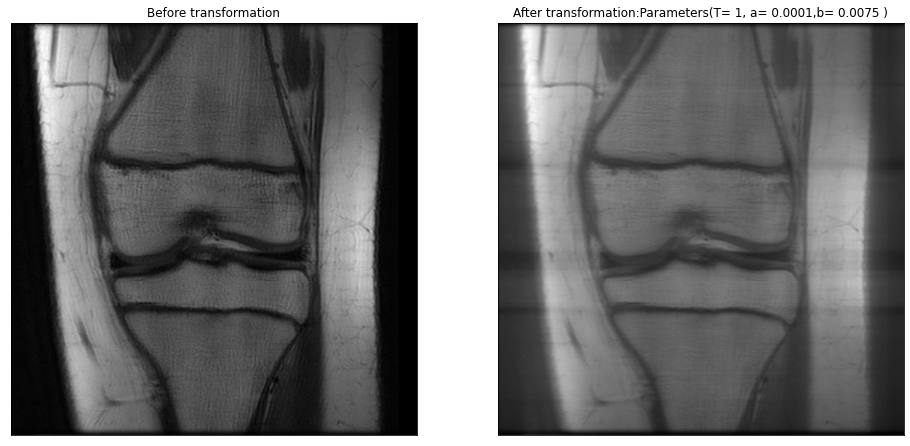

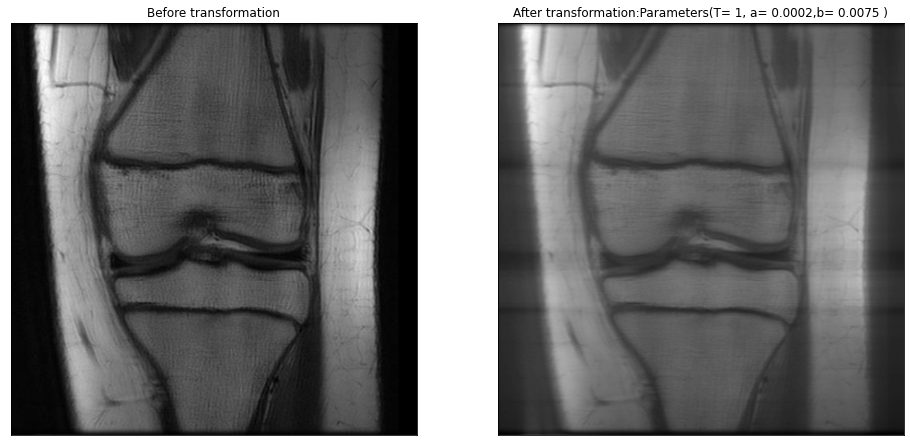

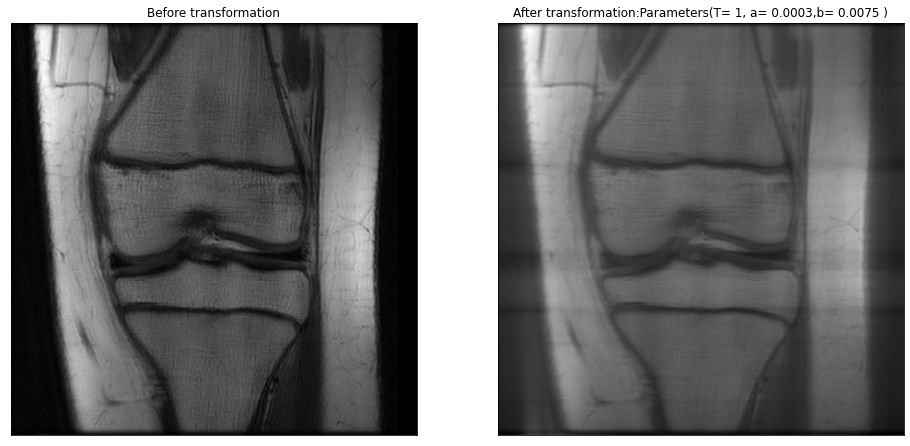

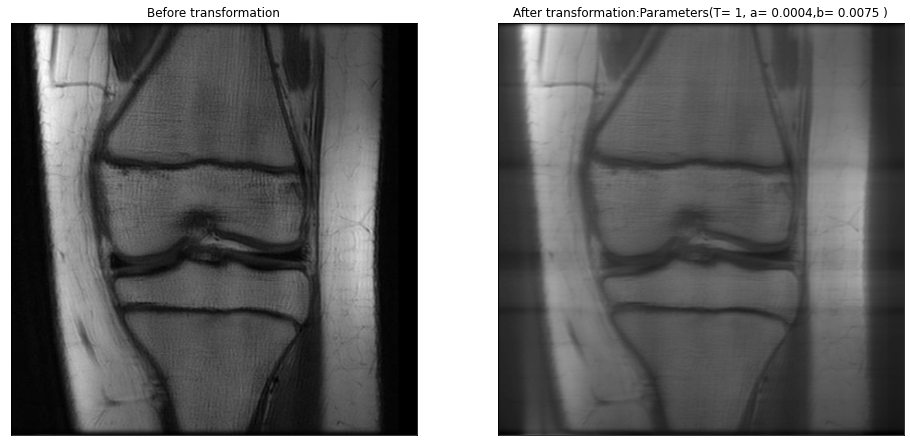

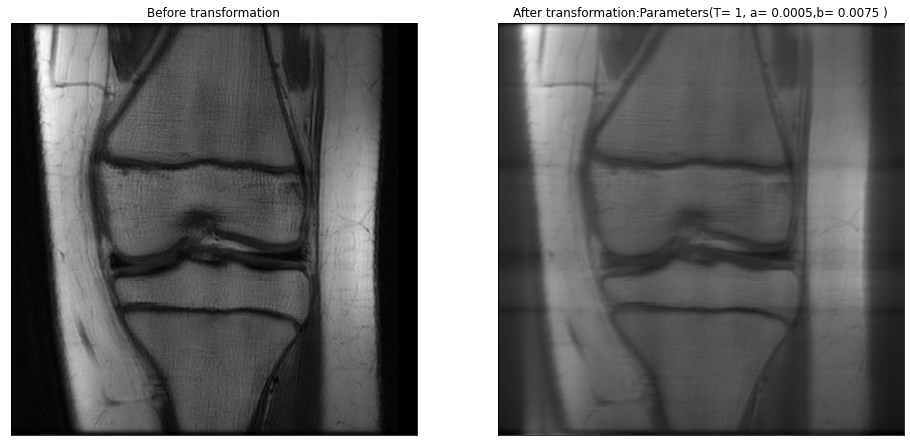

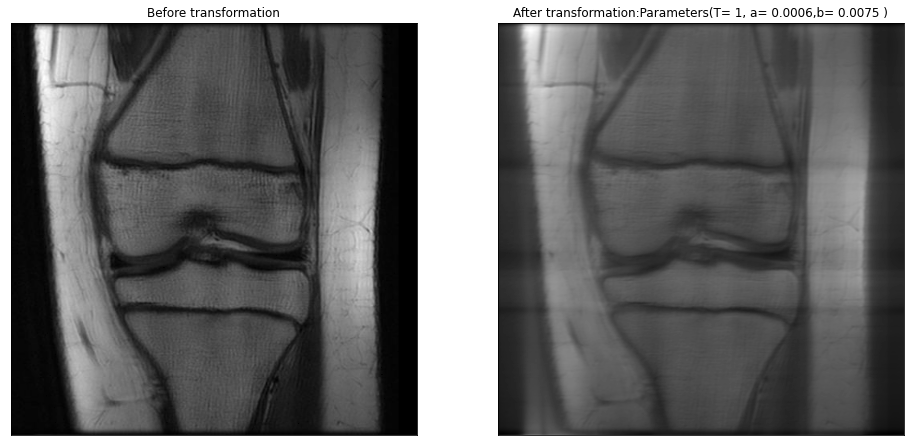

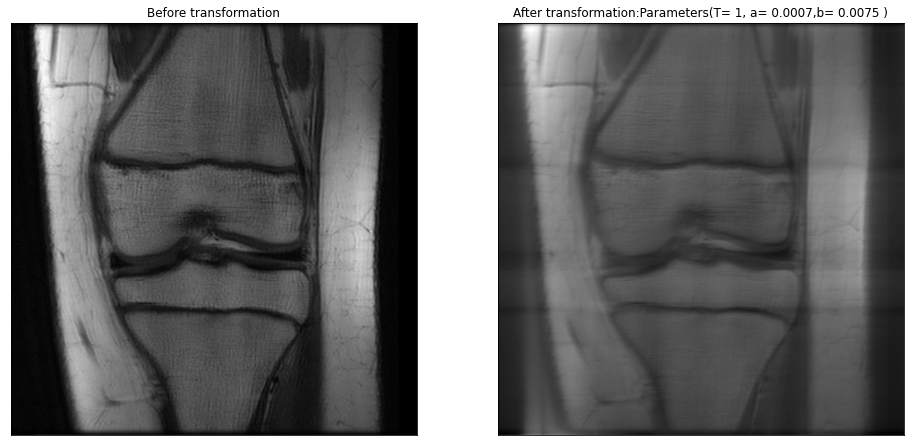

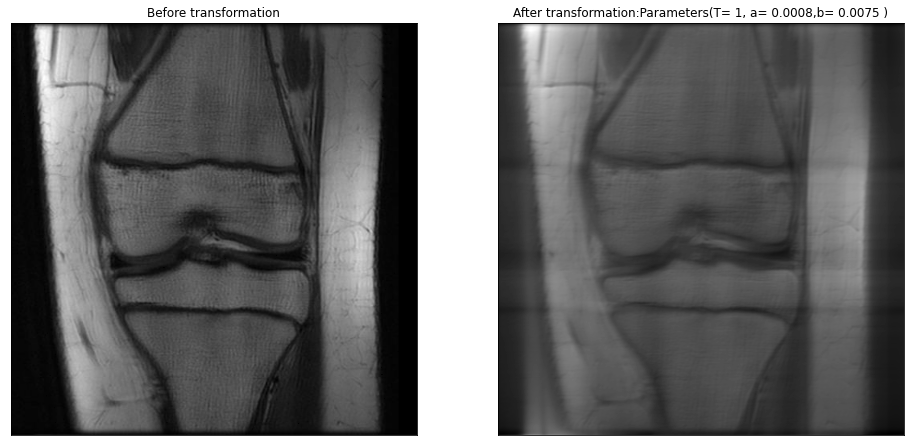

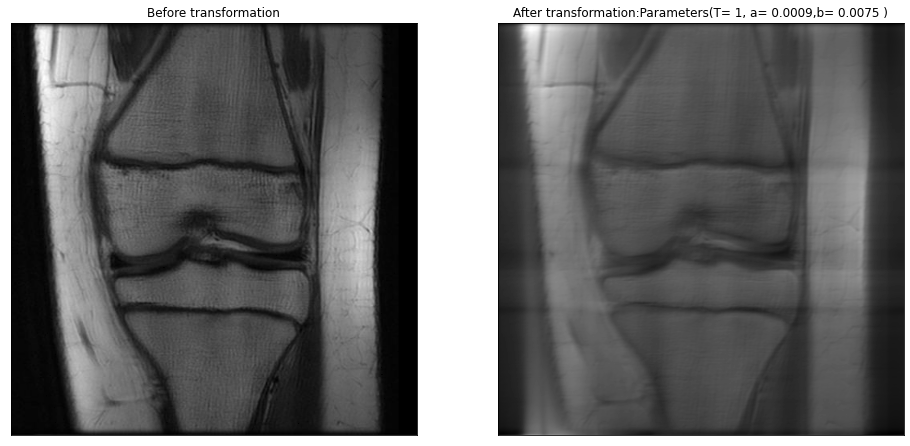

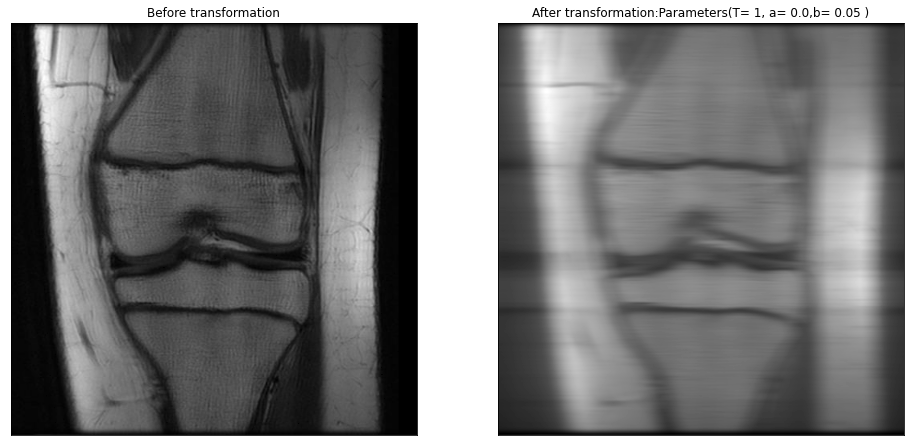

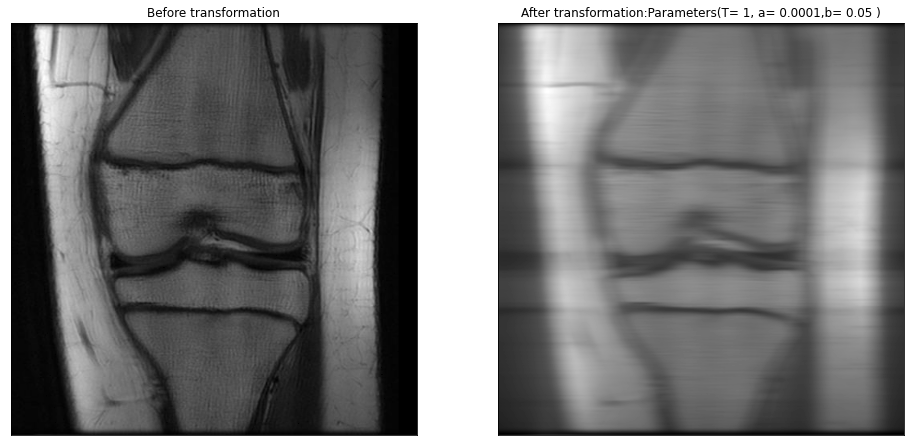

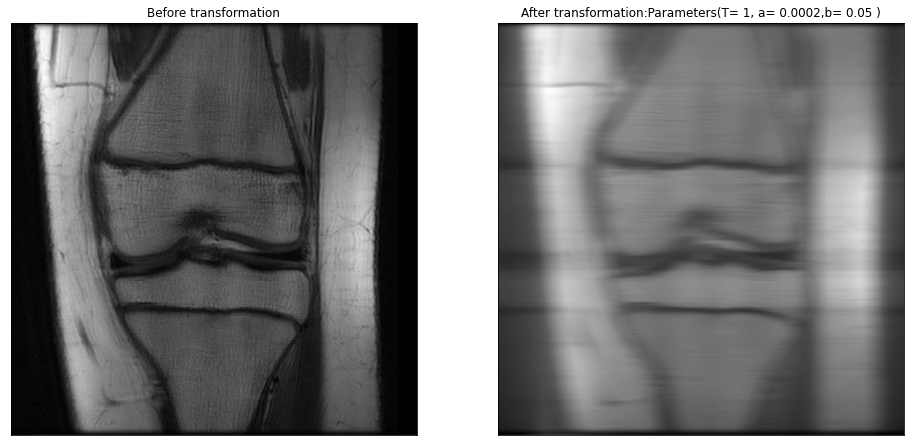

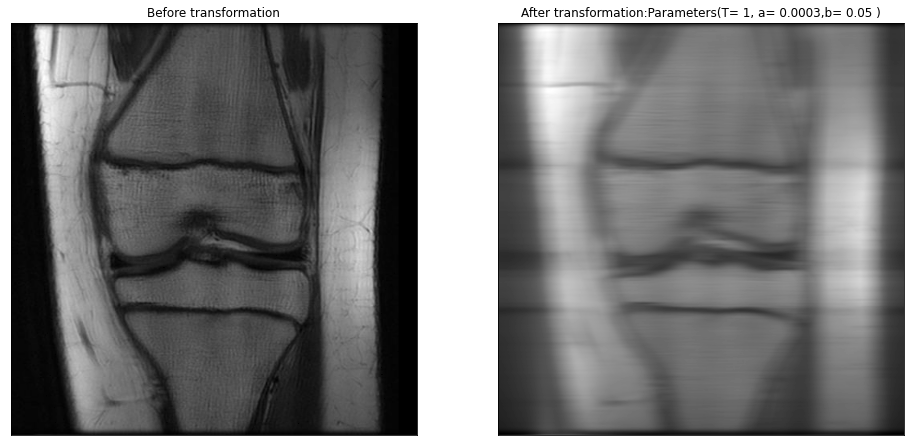

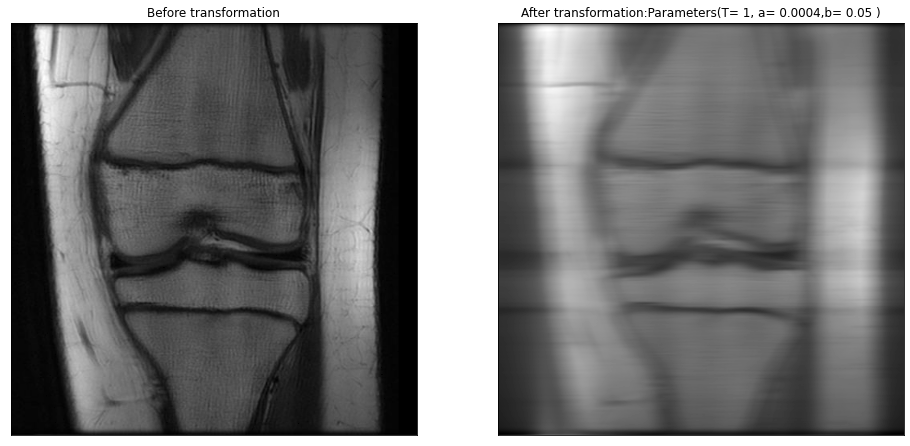

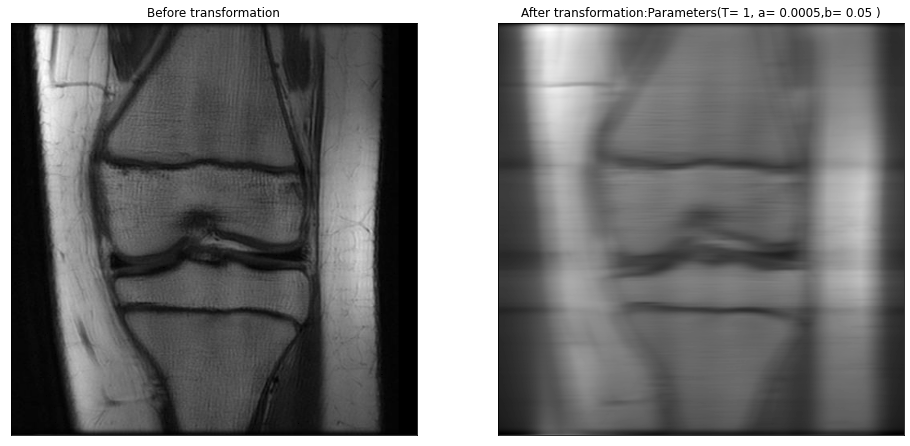

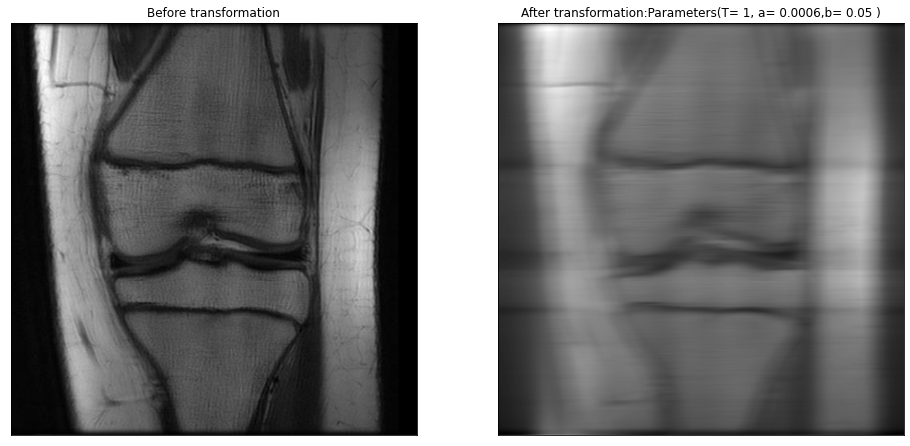

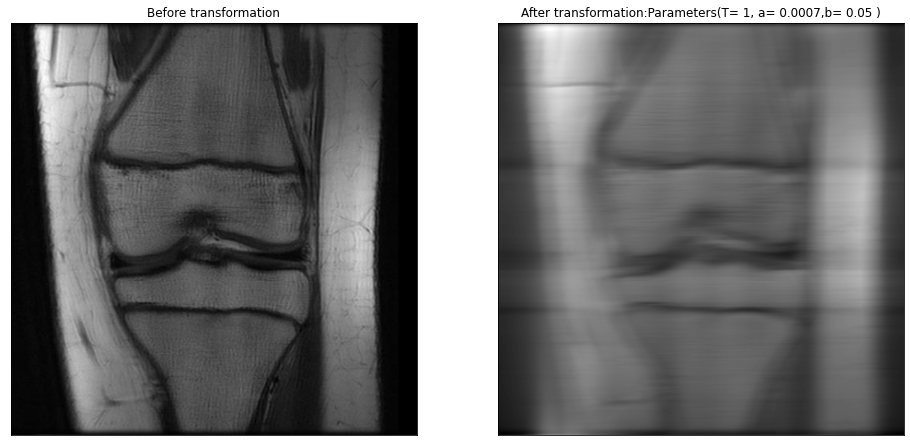

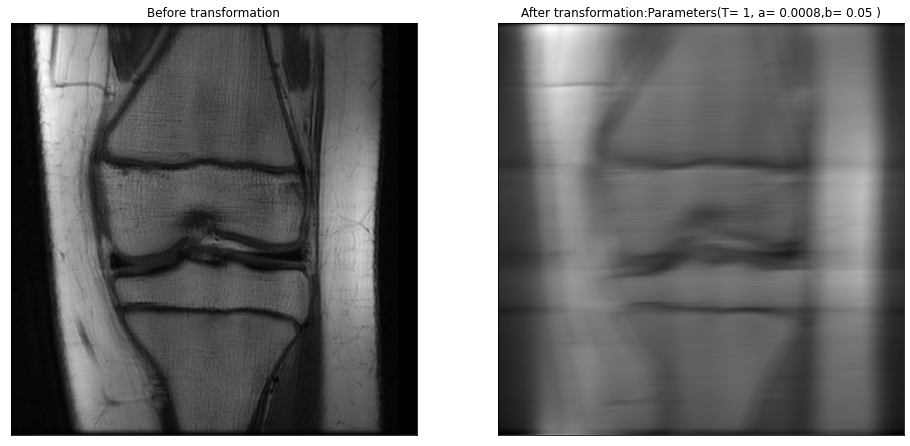

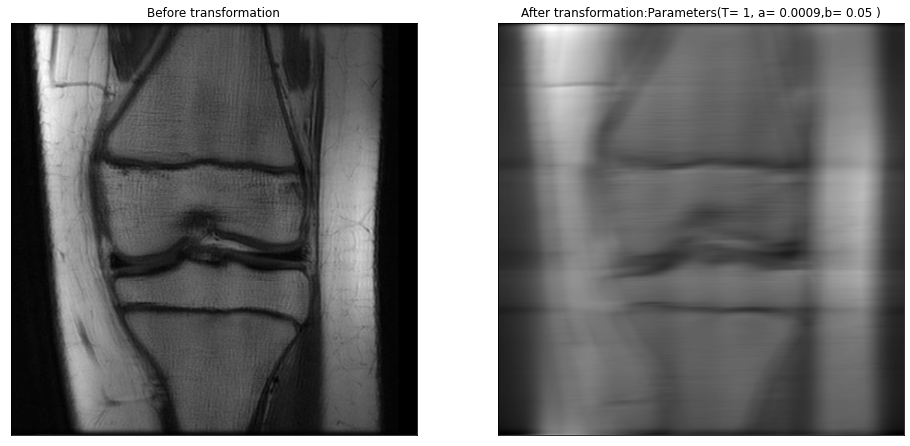

In [5]:
# generate images keeping constant T=1 and B=0.0075 and varying value of a from (0-0.001 with step size 0.0001)
a =[x/10000 for x in range(0, 10)]
ax = blur.generate_blurr_constant_b_and_T(1,a,[0.0075])

# generate images keeping constant T=1 and B=0.05 and varying value of a from (0-0.001 with step size 0.0001)
ay = blur.generate_blurr_constant_b_and_T(1,a,[0.05])


KeyboardInterrupt: 

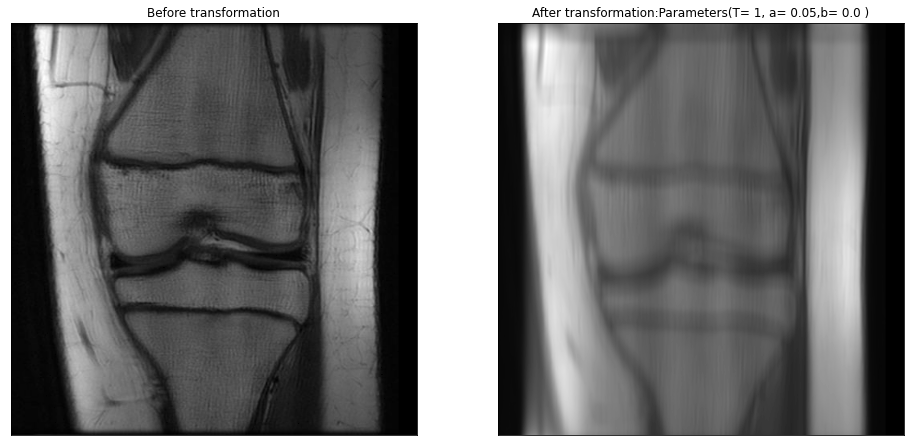

In [6]:
# generate images keeping constant T=1 and a=0.0075 and varying value of b from (0-0.002 with step size 0.0075)
b =[x/10000 for x in range(0, 20,3)]
bx = blur.generate_blurr_constant_a_and_T(1,[0.0075],b)

# generate images keeping constant T=1 and a=0.05 and varying value of b from (0-0.002 with step size 0.0075)
by = blur.generate_blurr_constant_a_and_T(1,[0.05],b)

In [ ]:
# generate images for combination of a, b and T
b =[x/1000 for x in range(0,10)]
a =[x/1000 for x in range(5,55,5)]
T = [0.5,1]

t_ab = blur.generate_blurr_combination_a_and_b_and_T(T,a,b)

In [ ]:
a